Idendify and import libraries/packages

pandas
numpy - numerical python
scipy - scientific python 
matplotlib
OS

In [1]:
import pandas as pd            # impoting pandas and numpy
import numpy as np

In [2]:
from scipy import stats as st                 
from matplotlib import pyplot as plt
import os                           # import scipy, matplotlib and os

### Working directory
                    The location where file to save. 
                    

In [3]:
os.getcwd()

'C:\\Users\\arun'

In [4]:
os.chdir('F:\Skillenable\Data frames')   # changed the working directory
os.getcwd()

'F:\\Skillenable\\Data frames'

In [5]:
fuel = pd.read_csv('FuelConsumption.csv')
fuel.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,12.1,8.7,10.6,27,244


Descriptive stats
* Meaning of central tendancy
* Measures og dispersion
* Quartiles using box plot
* data distribution and skewness
* correlation and causation

# Measures of central tendancy
Mean: average= sum of all obs / no of observation
Median: the middle value of sorted data
mde: most repeatad value


In [6]:
# CO2emmision
# np.mean()
np.mean(fuel['CO2EMISSIONS'])

256.2286785379569

In [7]:
np.mean(fuel.CO2EMISSIONS)

256.2286785379569

In [8]:
fuel.shape

(1067, 10)

In [9]:
# Median
np.median(fuel.CO2EMISSIONS)

251.0

In [10]:
np.median(fuel.FUELCONSUMPTION_CITY)

12.6

In [11]:
#MODE

st.mode(fuel.ENGINESIZE)

ModeResult(mode=array([2.]), count=array([158]))

In [12]:
fuel_enginesize = st.mode(fuel.ENGINESIZE)
print("The most preferred engine sixe is {} and is repeated {} times." . format(fuel_enginesize.mode[0], fuel_enginesize.count[0]))

The most preferred engine sixe is 2.0 and is repeated 158 times.


# Measure of variation/dispersion
Range:  DIfference between the max and the min value
standard deviation: Average deviation from the mean value
variance: std^2


In [13]:
# STANDARD Deviation
# EG. ## 5.5ft average
      ## 5ft, 6ft
    ### deviation of each person height from 5ft to 6ft
    ## Average of deviation of all people is standard deviation
    


In [14]:
np.std(fuel.CO2EMISSIONS)

63.34260099404251

In [15]:
# Varience
np.var(fuel.CO2EMISSIONS)

4012.2851006904757

In [16]:
std = np.std(fuel.CO2EMISSIONS)
std * std

4012.2851006904757

In [17]:
#range
# using point to point function

np.ptp(fuel.CO2EMISSIONS)


380

In [18]:
# finding min and max values
min = np.min(fuel.CO2EMISSIONS)
max = np.max(fuel.CO2EMISSIONS)
print(min)
print(max)
print(max-min)

108
488
380


In [19]:
fuel.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [20]:
## Interquartile range using box plot
## st.iqr

st.iqr(fuel.FUELCONSUMPTION_HWY)

3.3500000000000014

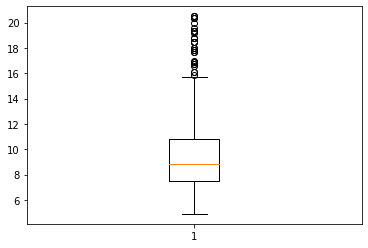

In [21]:
plt.boxplot(fuel.FUELCONSUMPTION_HWY)
plt.show()

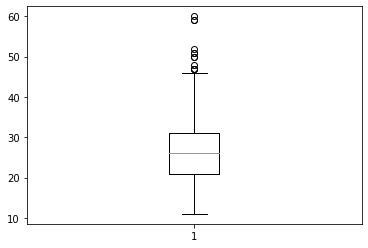

In [22]:
plt.boxplot(fuel.FUELCONSUMPTION_COMB_MPG)
plt.show()

In [23]:
st.iqr(fuel.FUELCONSUMPTION_COMB_MPG)

10.0

<function matplotlib.pyplot.show(close=None, block=None)>

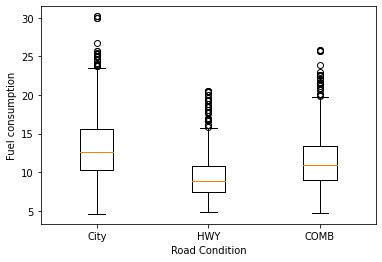

In [24]:
plt.boxplot([fuel.FUELCONSUMPTION_CITY, fuel.FUELCONSUMPTION_HWY, fuel.FUELCONSUMPTION_COMB], labels=['City', 'HWY', 'COMB'])
plt.xlabel("Road Condition")
plt.ylabel("Fuel consumption")
plt.show

In [25]:
## What is the trend of the average fuel consumption in mpg by vehicle class


In [26]:
fuel_class = fuel.groupby(fuel.VEHICLECLASS)[['FUELCONSUMPTION_COMB_MPG']].mean().reset_index().sort_values(by="FUELCONSUMPTION_COMB_MPG", ascending = False)
fuel_class.head()

,VEHICLECLASS,FUELCONSUMPTION_COMB_MPG
0,COMPACT,31.145349
9,STATION WAGON - SMALL,30.861111
2,MID-SIZE,30.331461
8,STATION WAGON - MID-SIZE,30.166667
3,MINICOMPACT,28.957447


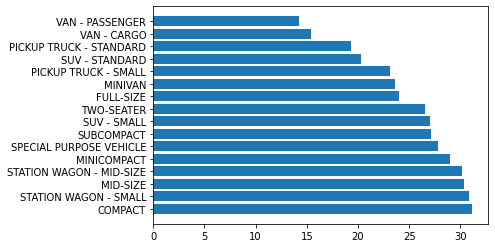

In [27]:
plt.barh(fuel_class.VEHICLECLASS, fuel_class.FUELCONSUMPTION_COMB_MPG)
plt.show()

In [28]:
# median fue consumption in highway

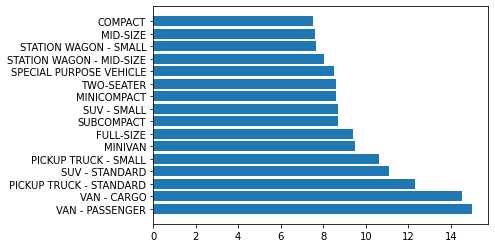

In [29]:
avg_fuel = fuel.groupby('VEHICLECLASS')[['FUELCONSUMPTION_HWY']].median().reset_index().sort_values("FUELCONSUMPTION_HWY", ascending=False)
plt.barh(avg_fuel.VEHICLECLASS, avg_fuel.FUELCONSUMPTION_HWY)
plt.show()

## DATA DISTRIBUTION and SKEWNESS

* Normal distribution
* 

In [30]:
# Normal distribution
st.skew(fuel.FUELCONSUMPTION_HWY)
              # As skew value more than 1 i.e the data is highly skewed

1.2620814260248627

In [31]:
st.skew(fuel.CO2EMISSIONS)
 ## As skew value between 0 to 1 i.e the data is approximately symetric

0.5187840084529483

In [32]:
# to visualize skewness

In [33]:
import seaborn as sns

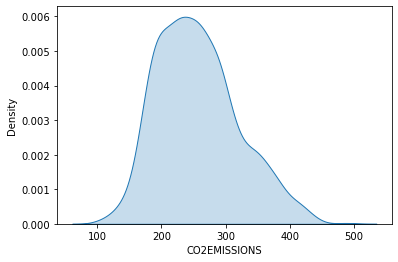

In [34]:
sns.kdeplot(fuel.CO2EMISSIONS, shade= True, label = 'CO2 emission', legend = True)
plt.show()

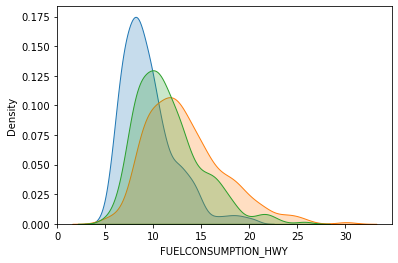

In [35]:
sns.kdeplot(fuel.FUELCONSUMPTION_HWY, shade= True, legend = True)
sns.kdeplot(fuel.FUELCONSUMPTION_CITY, shade= True, legend = True)
sns.kdeplot(fuel.FUELCONSUMPTION_COMB, shade= True, legend = True)


plt.show()

# Correlation
* If the two variable shows relation, it calls correlation. 


In [36]:
## Pearsons correlation lies between -1 nad 1 and it helps to identify the strength of hte relationship between variables.
## Scatter plot helps to identify if a erlationship exist, direction 

# st.pearsonr()

# PS : find the correlation between engine size and co2 emmision

st.pearsonr(fuel.ENGINESIZE, fuel.CO2EMISSIONS)


# strong +ve 

(0.8741543683958124, 0.0)

In [37]:
# PS: find the correlation between co2 emmision and fuel consumption_mpg

st.pearsonr(fuel.CO2EMISSIONS, fuel.FUELCONSUMPTION_COMB_MPG)
   # strong -ve correlation

(-0.9063942295226133, 0.0)

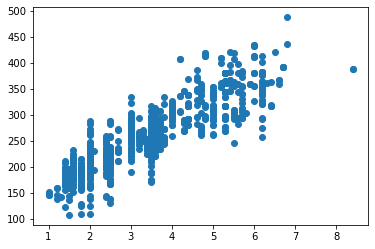

In [38]:
plt.scatter(fuel.ENGINESIZE, fuel.CO2EMISSIONS)
plt.show()

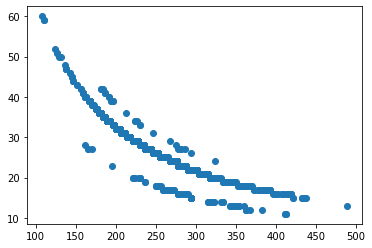

In [39]:
plt.scatter(fuel.CO2EMISSIONS, fuel.FUELCONSUMPTION_COMB_MPG)
plt.show()

# Inferential statistics

- Hypothesis
- Types of hypothesis test and when to use
- Steps to run hypothesis test
- p value


## Hypothesis
- A proposition based on assumptions.
- 90%, 98% and 99% confidence levels acceptable
- Significance level = 1- confidence level
- 

### null Hypothesis
                     - no relationship, equate sign
### alternative hypothesis
                      - not equal to: two tailed test
                      - greater than, less than: one tailed test 

## p value  
       #> p value > significance level: accept null hyp, reject alternate hyp
       #> p value < significance level: reject null hyp, accept alternate hyp
  
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#EX:  p value = 0.025 at 95% confidence level.


Steps to perform hypothesis testing

1) state the hypothesis
2) Decide on confidence and significance level
3) Choose a type of test
4) Gather evidence (conduct the test)
5) Compare the p value with alpha
6) conclusion


### 1 sample test : claimed value
### 2 sample : compare two variable
### multisample test : more than 2 variables


In [40]:
# 1 sample test : claimed value

# blanket statement: fuel consumption  in the city road is claimed to be 10 lit for per 100 kms.

    ## null: average fuel consumption of compact cars= 10l/100km
    ## alt: Average fuel consumption of compact cars != 10l/100kms
    ## confidence level = 95%, therefore, signification level = 5%
    
    #> 1 sample t test
    
    

In [41]:
compact = fuel['FUELCONSUMPTION_CITY'][fuel['VEHICLECLASS']=='COMPACT']
compact.head()
compact.shape

(172,)

In [42]:
# creating sample
compact_sample = compact.sample(50)


In [43]:
## st.ttest_1sample()

st.ttest_1samp(compact_sample, 10)    # 10 is a claimed value

Ttest_1sampResult(statistic=0.8032871213565873, pvalue=0.42568837577685603)

In [44]:
## since p value > 0.05, accept the NULL hypothesis

In [45]:
# problem 2: # blanket statement: fuel consumption  in the city road is claimed to be 10 lit for per 100 kms for SUV - standard.

suv_std = fuel['FUELCONSUMPTION_CITY'][fuel['VEHICLECLASS']=='SUV - STANDARD']
suv_std.head()
suv_std.shape

(110,)

In [46]:
# creating sample
suv_std_sample = suv_std.sample(50)


In [47]:
st.ttest_1samp(suv_std_sample, 10)

Ttest_1sampResult(statistic=11.493458231718737, pvalue=1.6250071237629652e-15)

In [48]:
# here p < 0.05, reject null 

## 2 sample t test

## take same 1st que

### NULL : fuel consumption of compact and std are the same
### Alt: Fuel consumption of compact and suv atd are not the same
### confidence: 90%, sign: 10%


In [49]:
st.ttest_ind(compact_sample, suv_std_sample)


Ttest_indResult(statistic=-9.855968109006154, pvalue=2.486062781631646e-16)

In [50]:
## reject null and accept the alt hypo, there is no enough evidence to support the null hypothesis


## Anova test

In [51]:
# compare fuel consumption with VAN - PASSENGER 

In [52]:
van = fuel['FUELCONSUMPTION_CITY'][fuel['VEHICLECLASS']=='VAN - PASSENGER']
van.head()
van.shape

(25,)

In [53]:
van_sample = van.sample(20)

In [54]:
## ANOVA test : when more than 2 veriable we do anova test
## st.f_oneway()


### NULL : fuel consumption of compact SUV and van  are the same
### Alt: Fuel consumption of compact and suv atd are not the same
### confidence: 90%, sign: 10%

In [55]:
st.f_oneway(compact_sample, van_sample)

F_onewayResult(statistic=376.31925807124486, pvalue=2.0077633900356637e-29)

In [56]:
# p value < 0.05, accept the alternative hypothesis, there is not enough evidence to support the null hypothesis, 


### pre t test: we do this test on same people/sample


In [60]:
breakups = pd.read_csv("breakups.csv")
breakups.head()
breakups.shape

(20, 2)

In [61]:
st.ttest_rel(breakups.Before_Breakup, breakups.After_Breakup)  # rel is relative

Ttest_relResult(statistic=-0.5375404241815105, pvalue=0.5971346738292477)

In [ ]:
# let confidence level 90%, p value > 0.05, accept null 

## Confidence interval
we have a data frame
we will take sample1
again take another sample
cofidence - 95%
CO2 emmision

confidence interval 
        ci = st.norm.interval(0.95, loc= fuel.CO2EMISSIONS.mean().scale =fuel.CO2EMISSIONS.std())


In [63]:
#confidence interval 
ci = st.norm.interval(0.95, loc= fuel.CO2EMISSIONS.mean(),scale =fuel.CO2EMISSIONS.std())


In [64]:
print("The confidence interval at 95% confidence level is ", np.round(ci, 4))

The confidence interval at 95% confidence level is  [132.0212 380.4361]
